# Simple ML model to identify carrot images

This project presents a basic machine learning pipeline for classifying images into two categories: carrot and not carrot. A Logistic Regression model is used to predict the probability that a given image belongs to the carrot class.

Logistic Regression is a supervised learning algorithm commonly used for classification tasks. It models the relationship between input features and the probability of belonging to a specific class.

For the purpose of this project, a small dataset is used, organized into two folders: carrot and not_carrot. Each folder contains images corresponding to its class.

# 1. Imports

In this project, we use the scikit-learn library to build and evaluate the Logistic Regression model. For evaluation, we use accuracy_score, classification_report, and confusion_matrix. Additional libraries such as OpenCV (cv2), NumPy, and Matplotlib are used for image processing and visualization.

In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 2. Load and Process Data

The next step is to load and process the images. All images are resized to 64x64. The image data is stored in X, and the corresponding labels are stored in Y. The model iterates through dataset, each subfolder name represent a class. The model loads each image, resize it, and add it to X with the corresponding Y. Finally, the lists are converted to NumPy arrays.

Found classes: ['Carrot', 'NotCarrot']
Loaded 618 images.


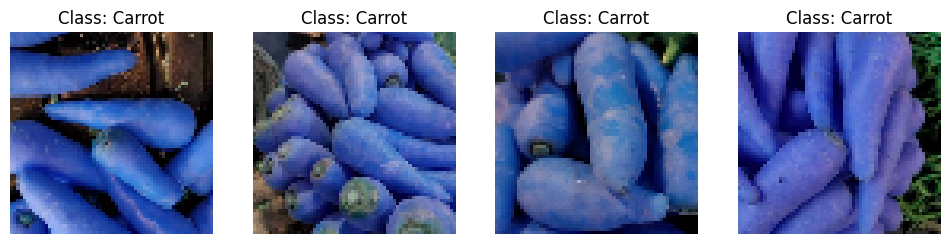

In [36]:
DATASET_PATH = "dataset"

image_size = 64
X = []
y = []

class_names = sorted([
    d for d in os.listdir(DATASET_PATH)
    if os.path.isdir(os.path.join(DATASET_PATH, d)) and not d.startswith(".")
])

for label_index, class_name in enumerate(class_names):
    class_folder = os.path.join(DATASET_PATH, class_name)
    if not os.path.isdir(class_folder):
        continue
    for filename in os.listdir(class_folder):
        filepath = os.path.join(class_folder, filename)
        img = cv2.imread(filepath, cv2.IMREAD_COLOR)
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            y.append(label_index)

X = np.array(X)
y = np.array(y)

print("Found classes:", class_names)
print("Loaded", len(X), "images.")


_, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))
for ax, img, label in zip(axes, X[:4], y[:4]):
    ax.imshow(img)
    ax.set_title(f"Class: {class_names[label]}")
    ax.axis("off")



# 3. Normalization and Classification

Before training the model, the images are normalized and flattened. The data is split into training and testing sets using train_test_split with 80% of the data for training and 20% for testing. Finally, The Logistic Regression model is trained on the training data, and its performance is evaluated using accuracy, a classification report, and a confusion matrix.


In [24]:
X_normalized = X / 255.0
n_samples = len(X_normalized)
X_flattened = X_normalized.reshape((n_samples, -1))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_flattened, y, test_size=0.2, stratify=y, random_state=42
)

# Train logistic regression
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

#evaluate the model
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy on test set: 0.9112903225806451

Classification Report:
               precision    recall  f1-score   support

      Carrot       0.92      0.97      0.95        98
   NotCarrot       0.86      0.69      0.77        26

    accuracy                           0.91       124
   macro avg       0.89      0.83      0.86       124
weighted avg       0.91      0.91      0.91       124

Confusion Matrix:
 [[95  3]
 [ 8 18]]


# Test

Testing the model with a test image

Predicted class: NotCarrot


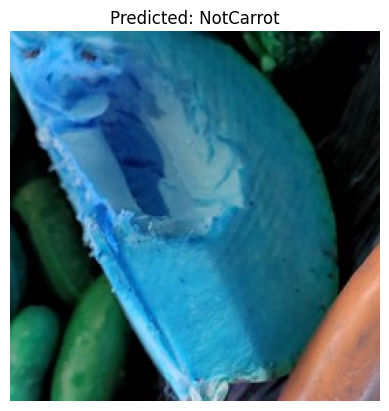

In [38]:

test_image_path = "../0515.jpg"

img = cv2.imread(test_image_path, cv2.IMREAD_COLOR)
if img is None:
    print("Failed to load image!")
else:
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0                      # normalize
    img = img.flatten().reshape(1, -1)     # flatten and reshape for model

    # Predict
    prediction = clf.predict(img)[0]
    predicted_class = class_names[prediction]

    print(f"Predicted class: {predicted_class}")

    # Show the image
    plt.imshow(cv2.imread(test_image_path))
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()
